# Machine Learning project: Tree predictors for binary classification
This project builds Decision Trees and Random Forests **from scratch** to classify mushrooms as **edible** or **poisonous**, using various splitting criteria including **Gini**, **Entropy**, and **Scaled Entropy**. It includes:
- Data cleaning and preprocessing
- Exploratory Data Analysis (EDA)
- Custom decision tree implementation
- Hyperparameter tuning with grid search
- Evaluation using validation/test sets
- Feature usage and confusion matrices
- Random forest ensemble method

In [5]:
import pandas as pd
import numpy as np
import csv

## Downloading and cleaning of data
We use two datasets:
- `primary_data.csv`: Real-world mushroom data with missing values and ranges
- `secondary_data.csv`: Cleaned and synthetic dataset for modeling

In [6]:
df_primary = pd.read_csv('/Users/menimalina/Desktop/uni_due/3 trimester/machine learning/project ML/MushroomDataset/primary_data.csv', delimiter=';')

In [7]:
df_secondary = pd.read_csv('/Users/menimalina/Desktop/uni_due/3 trimester/machine learning/project ML/MushroomDataset/secondary_data.csv', delimiter=';')

In [8]:
df_primary

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,NaN,[g],[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,NaN,[g],"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,NaN,[g],[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]"
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,NaN,NaN,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s]


In [9]:
df_secondary

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


## Preprocessing

- Drop columns with more than 50% missing values
- Fill remaining NaNs (categorical: 'unknown', numeric: mean)
- Label encode categorical variables
- Normalize numeric columns

In [10]:
df_primary.columns = [col.lower().strip().replace(" ", "-") for col in df_primary.columns]
df_secondary.columns = [col.lower().strip().replace(" ", "-") for col in df_secondary.columns]


In [11]:
# dropping columns with >50% missing values
missing_threshold = 0.5
missing_ratios = df_secondary.isna().mean()
columns_to_drop = missing_ratios[missing_ratios > missing_threshold].index.tolist()
df_secondary.drop(columns=columns_to_drop, inplace=True)

In [10]:
df_secondary.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [11]:
df_primary.describe()

,family,name,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,173,173,173,173,173,133,173,173,145,102,...,27,65,173,9,21,173,166,18,173,173
unique,23,173,2,51,27,40,67,2,8,3,...,5,14,41,1,7,2,13,8,21,10
top,Tricholoma Family,Fly Agaric,p,"[2, 5]",[x],[y],[n],[f],[a],[c],...,[s],[s],[w],[u],[w],[f],[f],[k],[d],"[u, a]"
freq,43,1,96,16,48,14,38,143,32,70,...,9,15,57,9,15,130,137,5,104,106


In [12]:
# Fill remaining NaNs
for col in df_secondary.columns:
    if df_secondary[col].dtype == object:
        df_secondary[col] = df_secondary[col].fillna('unknown')
    else:
        df_secondary[col] = df_secondary[col].fillna(df_secondary[col].mean())


In [13]:
def label_encode(series):
    unique_vals = sorted(series.unique())
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    return series.map(mapping), mapping

In [14]:
encoders = {}
for col in df_secondary.columns:
    if col == 'class':
        df_secondary[col] = df_secondary[col].map({'e': 0, 'p': 1})
    elif df_secondary[col].dtype == object:
        df_secondary[col], enc_map = label_encode(df_secondary[col])
        encoders[col] = enc_map

In [15]:
# Normalize numeric features
numeric_cols = ['cap-diameter', 'stem-height', 'stem-width']
for col in numeric_cols:
    mean = df_secondary[col].mean()
    std = df_secondary[col].std()
    df_secondary[col] = (df_secondary[col] - mean) / std

In [16]:
df_secondary

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.619449,6,2,6,0,2,3,10,3.076679,0.492289,11,1,2,0,3
1,1,1.873967,6,2,6,0,2,3,10,3.385283,0.601895,11,1,2,0,2
2,1,1.393421,6,2,6,0,2,3,10,3.328904,0.557056,11,1,2,0,3
3,1,1.412415,2,3,1,0,2,3,10,2.726533,0.381687,11,1,5,0,3
4,1,1.501686,6,3,6,0,2,3,10,2.952051,0.503250,11,1,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,-1.054894,5,7,11,0,3,2,2,-0.786803,-0.590817,12,0,1,0,0
61065,1,-1.037800,2,7,11,0,3,2,2,-1.009353,-0.669534,12,0,1,0,0
61066,1,-1.037800,5,7,11,0,3,2,2,-0.807574,-0.575870,12,0,1,0,2
61067,1,-1.043498,2,7,11,0,3,2,2,-0.896594,-0.668537,12,0,1,0,2


## Exploratory analysis for Primary Data

In [17]:
import matplotlib.pyplot as plt

In [18]:
# --- 1. Basic Info ---
print("Shape:", df_primary.shape)
print("Columns:", df_primary.columns.tolist())
print("Class distribution:\n", df_primary['class'].value_counts())

Shape: (173, 23)
Columns: ['family', 'name', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Class distribution:
 class
p    96
e    77
Name: count, dtype: int64


In [19]:
# --- 2. Missing values per column ---
print("\n Missing values (%):")
missing = df_primary.isnull().mean() * 100
print(missing[missing > 0].sort_values(ascending=False))


 Missing values (%):
veil-type            94.797688
spore-print-color    89.595376
veil-color           87.861272
stem-root            84.393064
stem-surface         62.427746
gill-spacing         41.040462
cap-surface          23.121387
gill-attachment      16.184971
ring-type             4.046243
dtype: float64


In [20]:
# --- 3. Top families ---
print("\n Top Mushroom Families:")
print(df_primary['family'].value_counts().head(10))


 Top Mushroom Families:
family
Tricholoma Family     43
Russula Family        27
Bolete Family         14
Ink Cap Family        13
Cortinarius Family    11
Stropharia Family      8
Amanita Family         8
Wax Gill Family        8
Entoloma Family        7
Bracket Fungi          7
Name: count, dtype: int64


In [21]:
# --- 4. Most frequent cap shapes by class ---
print("\n Cap Shape by Class:\n")
print(df_primary.groupby('class')['cap-shape'].value_counts().unstack().fillna(0))


 Cap Shape by Class:

cap-shape  [b, f, s]  [b, f]  [b, x, f]  [b, x]  [b]  [c, f]  [c, x, f]  \
class                                                                     
e                0.0     2.0        0.0     0.0  2.0     0.0        1.0   
p                1.0     3.0        1.0     3.0  8.0     2.0        0.0   

cap-shape  [c, x]  [c]  [f, s]  ...  [p, x]  [p]  [s, o]  [s]  [x, f, s]  \
class                           ...                                        
e             1.0  1.0     3.0  ...     3.0  0.0     2.0  4.0        7.0   
p             0.0  2.0     5.0  ...     1.0  1.0     0.0  5.0        6.0   

cap-shape  [x, f]  [x, o]  [x, p]  [x, s]   [x]  
class                                            
e            14.0     0.0     1.0     1.0  23.0  
p            15.0     1.0     1.0     2.0  25.0  

[2 rows x 27 columns]


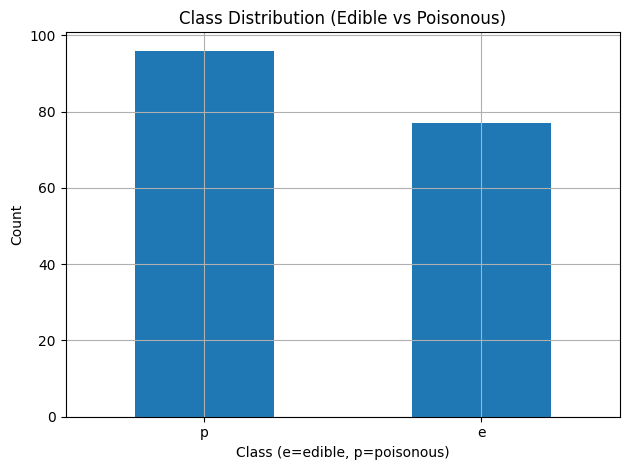

In [22]:
# --- 5. Visual: Class Distribution ---
df_primary['class'].value_counts().plot(kind='bar', title='Class Distribution (Edible vs Poisonous)', rot=0)
plt.xlabel("Class (e=edible, p=poisonous)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

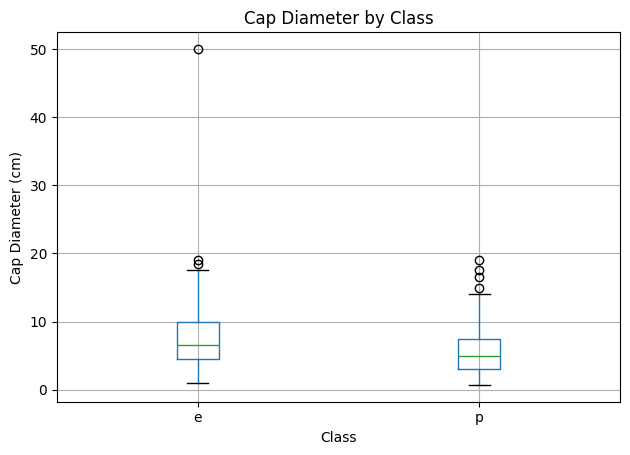

In [23]:
# --- 6. Visual: Cap Diameter Distribution (if numeric) ---
import ast

def parse_range(val):
    try:
        nums = ast.literal_eval(val)
        if isinstance(nums, list) and all(isinstance(n, (int, float)) for n in nums):
            return sum(nums) / len(nums)
    except:
        return None

if 'cap-diameter' in df_primary.columns:
    df_primary['cap-diameter-avg'] = df_primary['cap-diameter'].apply(parse_range)
    df_primary[['cap-diameter-avg', 'class']].dropna().boxplot(by='class', column='cap-diameter-avg')
    plt.title("Cap Diameter by Class")
    plt.suptitle("")
    plt.xlabel("Class")
    plt.ylabel("Cap Diameter (cm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

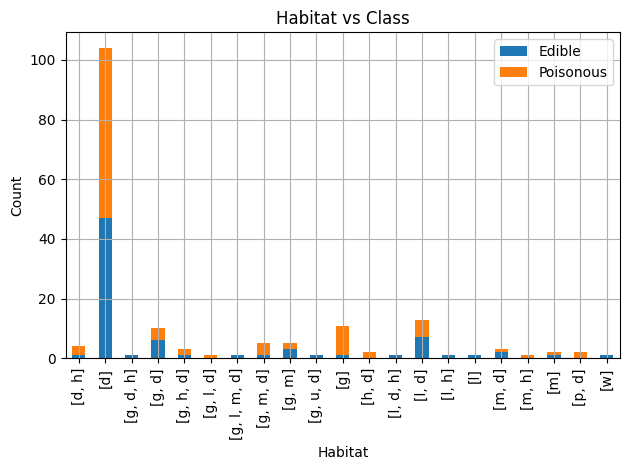

In [25]:
# --- 7. Habitat vs Class ---
pd.crosstab(df_primary['habitat'], df_primary['class']).plot(kind='bar', stacked=True)
plt.title("Habitat vs Class")
plt.xlabel("Habitat")
plt.ylabel("Count")
plt.legend(["Edible", "Poisonous"])
plt.grid(True)
plt.tight_layout()
plt.show()

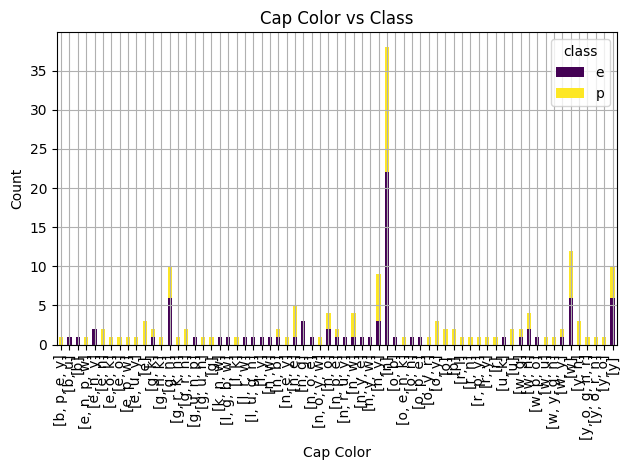

In [26]:
# --- 8. Cap Color vs Class ---
pd.crosstab(df_primary['cap-color'], df_primary['class']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Cap Color vs Class")
plt.xlabel("Cap Color")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

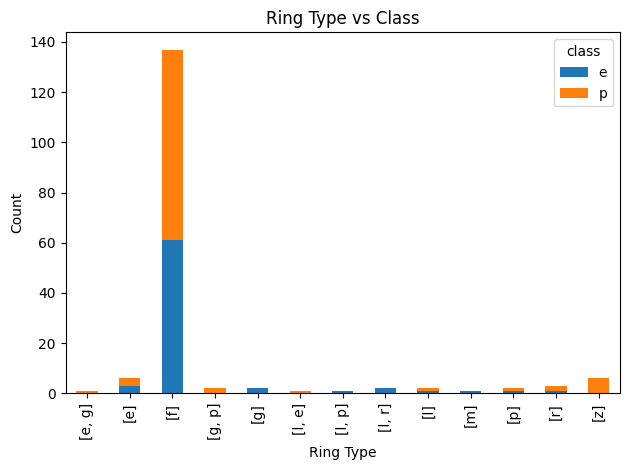

In [27]:
# --- 9. Ring Type vs Class ---
pd.crosstab(df_primary['ring-type'], df_primary['class']).plot(kind='bar', stacked=True)
plt.title("Ring Type vs Class")
plt.xlabel("Ring Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

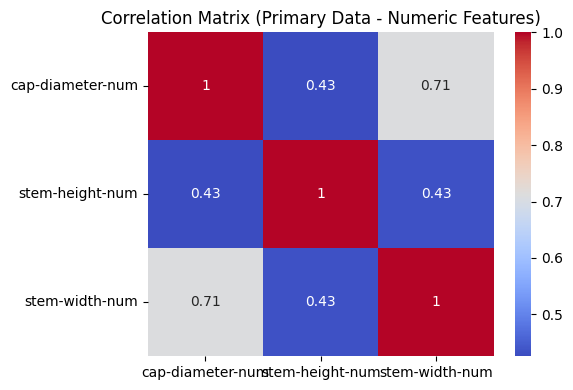

In [29]:
# --- Parse list-style numeric values like "[10, 15]" to average ---
import seaborn as sns
def parse_range(value):
    try:
        if isinstance(value, str):
            val = ast.literal_eval(value)
            if isinstance(val, list) and all(isinstance(v, (int, float)) for v in val):
                return sum(val) / len(val)
        elif isinstance(value, (int, float)):
            return value
    except:
        return None

# Create an empty DataFrame for normalized numeric data
df_primary_norm = pd.DataFrame()
# --- Convert relevant columns ---
df_primary_norm['cap-diameter-num'] = df_primary['cap-diameter'].apply(parse_range)
df_primary_norm['stem-height-num'] = df_primary['stem-height'].apply(parse_range)
df_primary_norm['stem-width-num'] = df_primary['stem-width'].apply(parse_range)

# --- Extract just the usable numeric data ---
numeric_data_pr = df_primary_norm[['cap-diameter-num', 'stem-height-num', 'stem-width-num']].dropna()

# --- Plot the correlation matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data_pr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Primary Data - Numeric Features)")
plt.tight_layout()
plt.show()

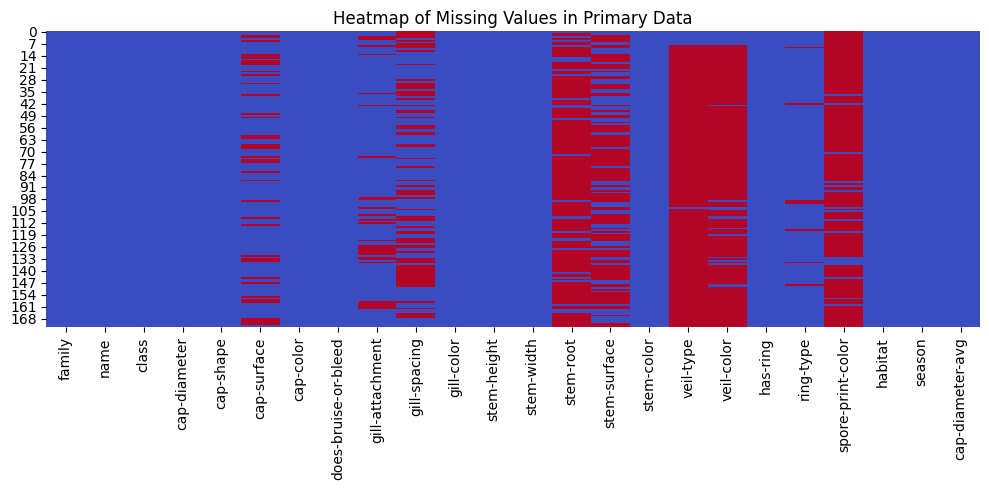

In [30]:
# --- 10. Heatmap of Missing Values ---
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(df_primary.isnull(), cbar=False, cmap='coolwarm')
plt.title("Heatmap of Missing Values in Primary Data")
plt.tight_layout()
plt.show()

## Exploratory analysis for secondary data

In [16]:
import seaborn as sns

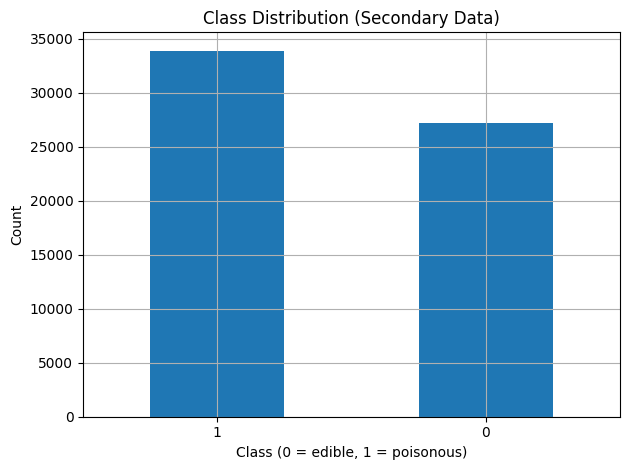

In [17]:
df_secondary['class'].value_counts().plot(kind='bar', title='Class Distribution (Secondary Data)', rot=0)
plt.xlabel("Class (0 = edible, 1 = poisonous)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

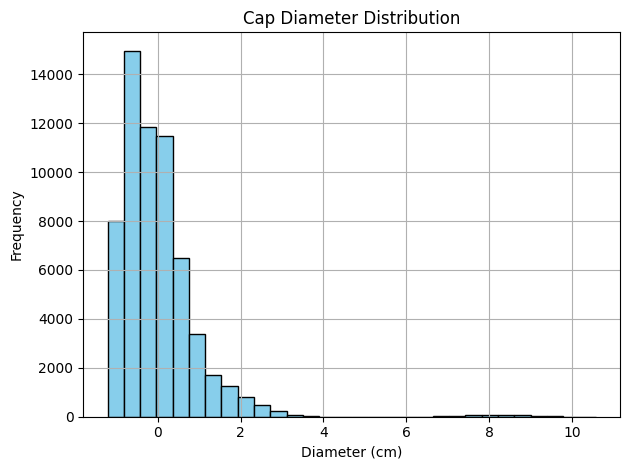

In [33]:
df_secondary['cap-diameter'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Cap Diameter Distribution")
plt.xlabel("Diameter (cm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

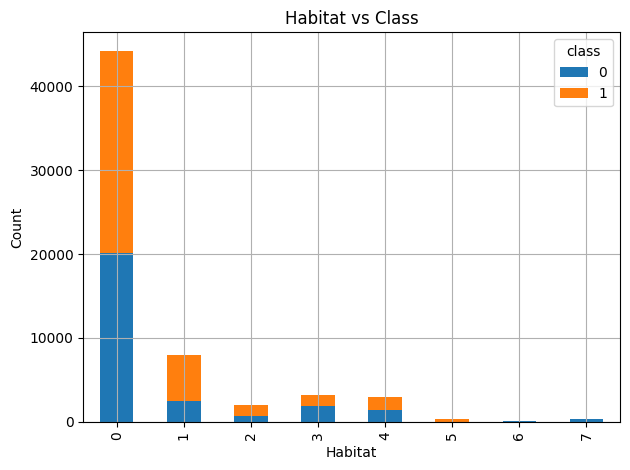

In [34]:
pd.crosstab(df_secondary['habitat'], df_secondary['class']).plot(kind='bar', stacked=True)
plt.title("Habitat vs Class")
plt.xlabel("Habitat")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

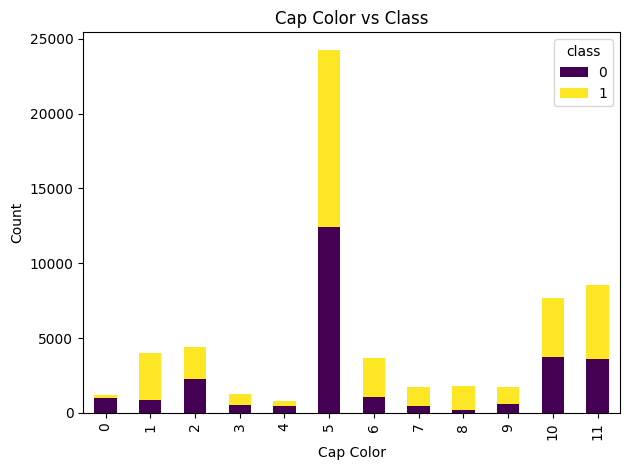

In [35]:
# --- 4. Cap Color by Class ---
pd.crosstab(df_secondary['cap-color'], df_secondary['class']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Cap Color vs Class")
plt.xlabel("Cap Color")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

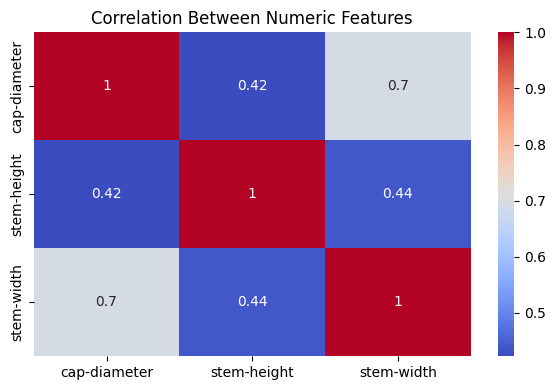

In [36]:
# --- 5. Numeric Feature Correlations (heatmap) ---
numeric_cols = ['cap-diameter', 'stem-height', 'stem-width']
plt.figure(figsize=(6, 4))
sns.heatmap(df_secondary[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()

## Tree predictors for binary classification
### Data preparation

In [18]:
# Shuffle and Split (manual) ---
data = df_secondary.to_numpy()
np.random.seed(42)
np.random.shuffle(data)

n = len(data)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

train_data = data[:n_train]
val_data = data[n_train:n_train + n_val]
test_data = data[n_train + n_val:]

X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_val, y_val = val_data[:, 1:], val_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (36641, 15), Validation: (12213, 15), Test: (12215, 15)


## 1. basic class for the node

In [19]:
import numpy as np

class TreeNode:
    def __init__(self, is_leaf=False, prediction=None, feature_index=None, threshold=None):
        self.left = None
        self.right = None
        self.is_leaf = is_leaf
        self.prediction = prediction
        self.feature_index = feature_index
        self.threshold = threshold

    def evaluate(self, x):
        if self.is_leaf:
            return self.prediction
        return self.right.evaluate(x) if x[self.feature_index] > self.threshold else self.left.evaluate(x)

## 2. class for the (binary) tree predictor
using scaled entropy, entropy, Gini splitting criteria

In [20]:
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return [int(self.root.evaluate(x)) for x in X]

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        if (depth >= self.max_depth or
            num_samples < self.min_samples_split or
            len(unique_classes) == 1):
            return TreeNode(is_leaf=True, prediction=self._majority_class(y))

        best_gain = 0
        best_feature = None
        best_threshold = None
        best_masks = None
        parent_impurity = self._impurity(y, total=len(y))

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_y = y[left_mask]
                right_y = y[right_mask]
                gain = self._gain(y, left_y, right_y, parent_impurity)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold
                    best_masks = (left_mask, right_mask)

        if best_gain == 0 or best_masks is None:
            return TreeNode(is_leaf=True, prediction=self._majority_class(y))

        left_X, left_y = X[best_masks[0]], y[best_masks[0]]
        right_X, right_y = X[best_masks[1]], y[best_masks[1]]

        node = TreeNode(is_leaf=False, feature_index=best_feature, threshold=best_threshold)
        node.left = self._build_tree(left_X, left_y, depth + 1)
        node.right = self._build_tree(right_X, right_y, depth + 1)
        return node

    def _majority_class(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def _gini_impurity(self, y):
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        return 1 - np.sum(probs ** 2)

    def _entropy(self, y):
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        return -np.sum([p * np.log2(p + 1e-9) for p in probs])  # Add small value to avoid log(0)

    def _scaled_entropy(self, y, total):
        return (len(y) / total) * self._entropy(y) if total > 0 else 0

    def _impurity(self, y, total=None):
        if self.criterion == 'gini':
            return self._gini_impurity(y)
        elif self.criterion == 'entropy':
            return self._entropy(y)
        elif self.criterion == 'scaled_entropy':
            return self._scaled_entropy(y, total)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

    def _gain(self, parent_y, left_y, right_y, parent_impurity):
        total = len(parent_y)
        left_imp = self._impurity(left_y, total)
        right_imp = self._impurity(right_y, total)
        weighted_avg = (len(left_y) / total) * left_imp + (len(right_y) / total) * right_imp
        return parent_impurity - weighted_avg

## 3. hyperparameter Tuning for a Decision Tree
Training decision trees with:
- Grid search over `max_depth` and `min_samples_split`
- 3 splitting criteria: `gini`, `entropy`, `scaled_entropy`

Validation error is measured to select the best configuration.

In [21]:
from itertools import product
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### Gini Criterion Results

In [26]:
max_depth_values = [3, 5, 7]
min_samples_split_values = [2, 5, 10]
grid = list(product(max_depth_values, min_samples_split_values))

# Run tuning with Gini
results = []

for max_depth, min_samples_split in grid:
    tree = DecisionTree(max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        criterion='gini')
    tree.fit(X_train, y_train)

    train_preds = tree.predict(X_train)
    val_preds = tree.predict(X_val)

    train_error = np.mean(train_preds != y_train)
    val_error = np.mean(val_preds != y_val)

    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'train_error': train_error,
        'val_error': val_error
    })


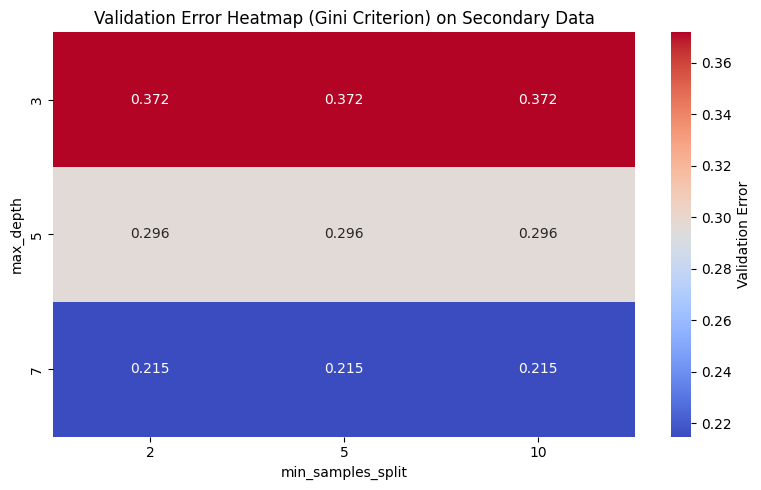

   max_depth  min_samples_split  train_error  val_error
0          3                  2     0.372806   0.371899
1          3                  5     0.372806   0.371899
2          3                 10     0.372806   0.371899
3          5                  2     0.289457   0.296078
4          5                  5     0.289457   0.296078
5          5                 10     0.289457   0.296078
6          7                  2     0.209874   0.214771
7          7                  5     0.209874   0.214771
8          7                 10     0.209874   0.214771


In [59]:
df_results = pd.DataFrame(results)
pivot_table = df_results.pivot(index="max_depth", columns="min_samples_split", values="val_error")

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".3f", cbar_kws={'label': 'Validation Error'})
plt.title("Validation Error Heatmap (Gini Criterion) on Secondary Data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()

print(df_results)

### Entropy Criterion Results

In [28]:
results_entropy = []

for max_depth, min_samples_split in grid:
    tree = DecisionTree(max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        criterion='entropy')
    tree.fit(X_train, y_train)

    train_preds = tree.predict(X_train)
    val_preds = tree.predict(X_val)

    train_error = np.mean(train_preds != y_train)
    val_error = np.mean(val_preds != y_val)

    results_entropy.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'train_error': train_error,
        'val_error': val_error
    })

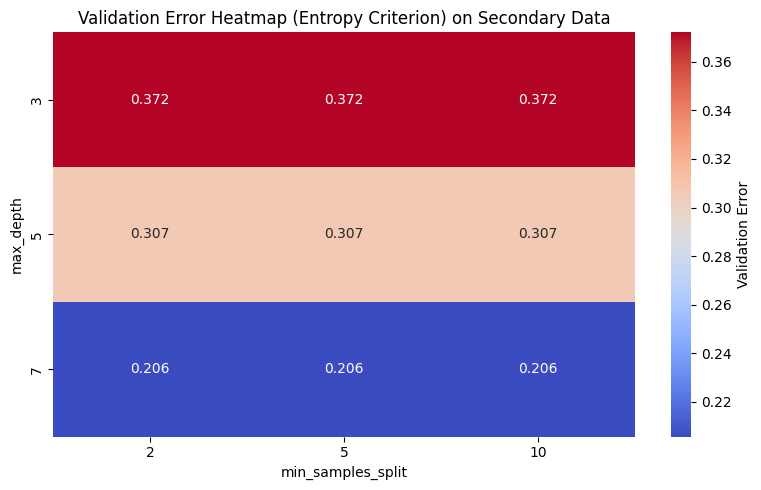

   max_depth  min_samples_split  train_error  val_error
0          3                  2     0.372943   0.372063
1          3                  5     0.372943   0.372063
2          3                 10     0.372943   0.372063
3          5                  2     0.299364   0.306804
4          5                  5     0.299364   0.306804
5          5                 10     0.299364   0.306804
6          7                  2     0.204389   0.205764
7          7                  5     0.204389   0.205764
8          7                 10     0.204389   0.205764


In [29]:
df_results_entropy = pd.DataFrame(results_entropy)

# Plot heatmap
pivot_table_entropy = df_results_entropy.pivot(index="max_depth", columns="min_samples_split", values="val_error")

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table_entropy, annot=True, cmap="coolwarm", fmt=".3f", cbar_kws={'label': 'Validation Error'})
plt.title("Validation Error Heatmap (Entropy Criterion) on Secondary Data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()

print(df_results_entropy)

### Scaled Entropy Criterion Results

In [31]:
results_scaled_entropy = []

for max_depth, min_samples_split in grid:
    tree = DecisionTree(max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        criterion='scaled_entropy')
    tree.fit(X_train, y_train)

    train_preds = tree.predict(X_train)
    val_preds = tree.predict(X_val)

    train_error = np.mean(train_preds != y_train)
    val_error = np.mean(val_preds != y_val)

    results_scaled_entropy.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'train_error': train_error,
        'val_error': val_error
    })

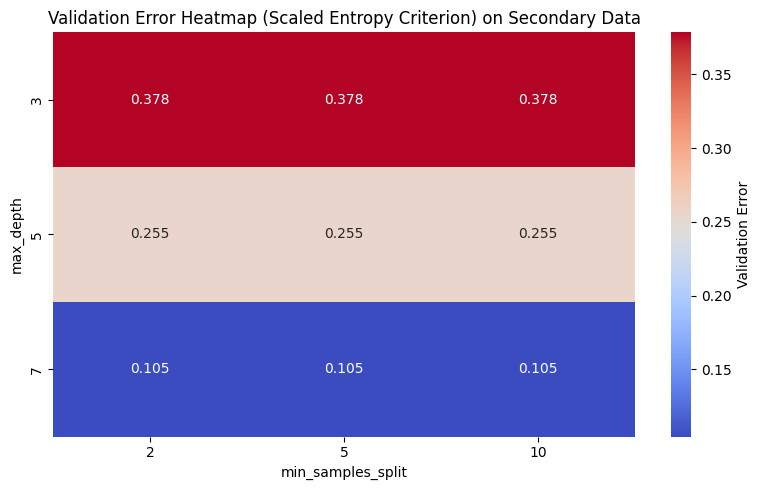

   max_depth  min_samples_split  train_error  val_error
0          3                  2     0.370377   0.378367
1          3                  5     0.370377   0.378367
2          3                 10     0.370377   0.378367
3          5                  2     0.245545   0.254647
4          5                  5     0.245545   0.254647
5          5                 10     0.245545   0.254647
6          7                  2     0.097841   0.104561
7          7                  5     0.097841   0.104561
8          7                 10     0.097841   0.104561


In [32]:
df_results_scaled_entropy = pd.DataFrame(results_scaled_entropy)

# Plot heatmap
pivot_table_scaled_entropy = df_results_scaled_entropy.pivot(
    index="max_depth", columns="min_samples_split", values="val_error"
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table_scaled_entropy, annot=True, cmap="coolwarm", fmt=".3f", cbar_kws={'label': 'Validation Error'})
plt.title("Validation Error Heatmap (Scaled Entropy Criterion) on Secondary Data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()

print(df_results_scaled_entropy)

In [33]:
print("\n Best validation results from each splitting criterion:\n")

best_gini = df_results.sort_values(by="val_error").iloc[0]
best_entropy = df_results_entropy.sort_values(by="val_error").iloc[0]
best_scaled_entropy = df_results_scaled_entropy.sort_values(by="val_error").iloc[0]

# Nicely format each
print("Gini Criterion:")
print(best_gini.to_string(index=True))
print("-" * 40)

print("Entropy Criterion:")
print(best_entropy.to_string(index=True))
print("-" * 40)

print("Scaled Entropy Criterion:")
print(best_scaled_entropy.to_string(index=True))
print("-" * 40)


 Best validation results from each splitting criterion:

Gini Criterion:
max_depth            7.000000
min_samples_split    2.000000
train_error          0.209874
val_error            0.214771
----------------------------------------
Entropy Criterion:
max_depth            7.000000
min_samples_split    2.000000
train_error          0.204389
val_error            0.205764
----------------------------------------
Scaled Entropy Criterion:
max_depth            7.000000
min_samples_split    2.000000
train_error          0.097841
val_error            0.104561
----------------------------------------


In [48]:
# Evaluate best models
for name, row in zip(
    ["Gini", "Entropy", "Scaled_Entropy"],
    [best_gini, best_entropy, best_scaled_entropy]
):
    tree = DecisionTree(
        max_depth=row["max_depth"],
        min_samples_split=row["min_samples_split"],
        criterion=name.lower()
    )
    tree.fit(X_train, y_train)  # train on same data used for tuning

    test_preds = tree.predict(X_test)
    test_error = np.mean(test_preds != y_test)
    test_accuracy = 1 - test_error

    print(f"{name} Criterion on Test Set:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Error:    {test_error:.4f}")
    print("-" * 40)

Gini Criterion on Test Set:
Test Accuracy: 0.7898
Test Error:    0.2102
----------------------------------------
Entropy Criterion on Test Set:
Test Accuracy: 0.7974
Test Error:    0.2026
----------------------------------------
Scaled_Entropy Criterion on Test Set:
Test Accuracy: 0.8962
Test Error:    0.1038
----------------------------------------


## Learning Curves
Visualizing how error changes with tree depth for the best `min_samples_split` for each criterion.

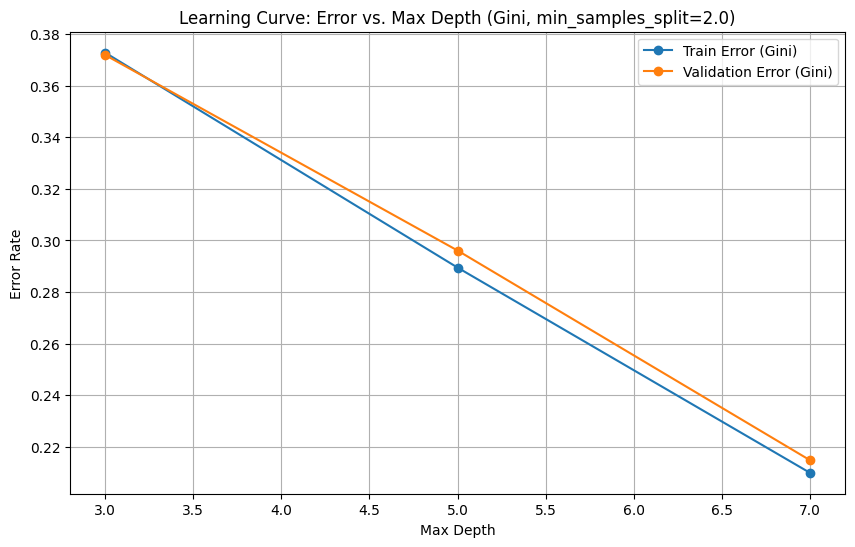

In [62]:
# Gini vs. max_depth
best_min_samples_split_gini = best_gini['min_samples_split']
plot_data_gini = df_results[df_results['min_samples_split'] == best_min_samples_split_gini]

plt.figure(figsize=(10, 6))
plt.plot(plot_data_gini['max_depth'], plot_data_gini['train_error'], marker='o', label='Train Error (Gini)')
plt.plot(plot_data_gini['max_depth'], plot_data_gini['val_error'], marker='o', label='Validation Error (Gini)')
plt.title('Learning Curve: Error vs. Max Depth (Gini, min_samples_split={})'.format(best_min_samples_split_gini))
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

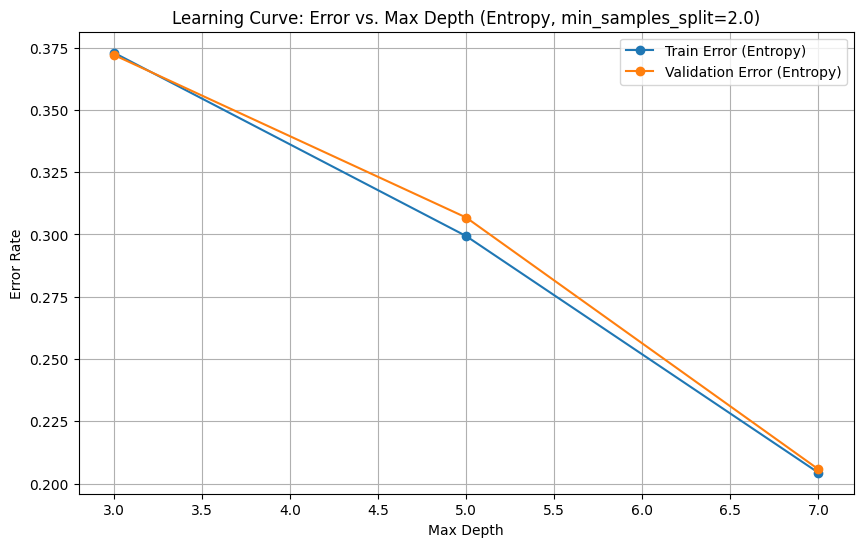

In [51]:
#Entropy vs. max_depth

best_min_samples_split_entropy = best_entropy['min_samples_split']
plot_data_entropy = df_results_entropy[df_results_entropy['min_samples_split'] == best_min_samples_split_entropy]

plt.figure(figsize=(10, 6))
plt.plot(plot_data_entropy['max_depth'], plot_data_entropy['train_error'], marker='o', label='Train Error (Entropy)')
plt.plot(plot_data_entropy['max_depth'], plot_data_entropy['val_error'], marker='o', label='Validation Error (Entropy)')
plt.title('Learning Curve: Error vs. Max Depth (Entropy, min_samples_split={})'.format(best_min_samples_split_entropy))
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

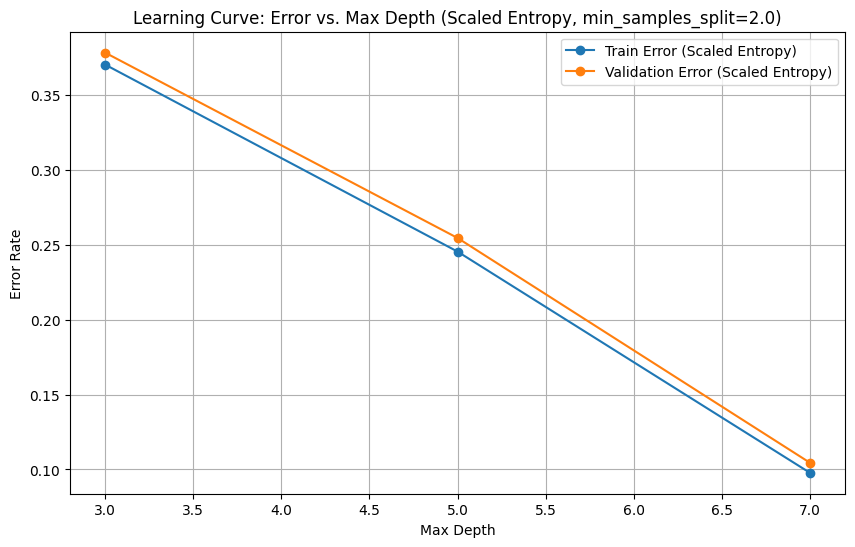

In [61]:
# Scaled Entropy vs. max_depth
best_min_samples_split_scaled_entropy = best_scaled_entropy['min_samples_split']
plot_data_scaled_entropy = df_results_scaled_entropy[df_results_scaled_entropy['min_samples_split'] == best_min_samples_split_scaled_entropy]

plt.figure(figsize=(10, 6))
plt.plot(plot_data_scaled_entropy['max_depth'], plot_data_scaled_entropy['train_error'], marker='o', label='Train Error (Scaled Entropy)')
plt.plot(plot_data_scaled_entropy['max_depth'], plot_data_scaled_entropy['val_error'], marker='o', label='Validation Error (Scaled Entropy)')
plt.title('Learning Curve: Error vs. Max Depth (Scaled Entropy, min_samples_split={})'.format(best_min_samples_split_scaled_entropy))
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

### Feature Usage in Best Tree
Extracting which features were used by the best-performing decision tree using `collect_features()`.

In [53]:
def collect_features(node, feature_set):
    if node is None or node.is_leaf:
        return
    feature_set.add(node.feature_index)
    collect_features(node.left, feature_set)
    collect_features(node.right, feature_set)

# Build tree
tree = DecisionTree(max_depth=7, min_samples_split=2, criterion='scaled_entropy')
tree.fit(X_train, y_train)

# Extract used feature indices
used_features_set = set()
collect_features(tree.root, used_features_set)

# Map to names
feature_names = df_secondary.drop(columns='class').columns.tolist()
used_feature_names = [feature_names[i] for i in sorted(used_features_set)]

print("📌 Features used in best tree:")
for name in used_feature_names:
    print(f" - {name}")


📌 Features used in best tree:
 - cap-diameter
 - cap-shape
 - cap-surface
 - cap-color
 - does-bruise-or-bleed
 - gill-attachment
 - gill-spacing
 - gill-color
 - stem-height
 - stem-width
 - stem-color
 - has-ring
 - ring-type


## Confusion Matrix and Class Distribution for the best splitting criteria

We analyze model predictions using:
- Confusion matrix
- Class distribution bar chart

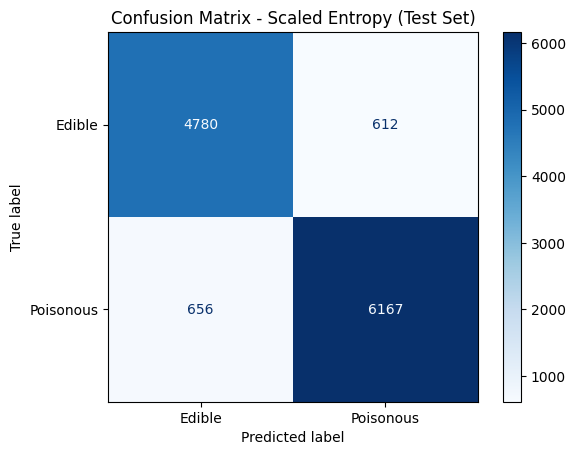

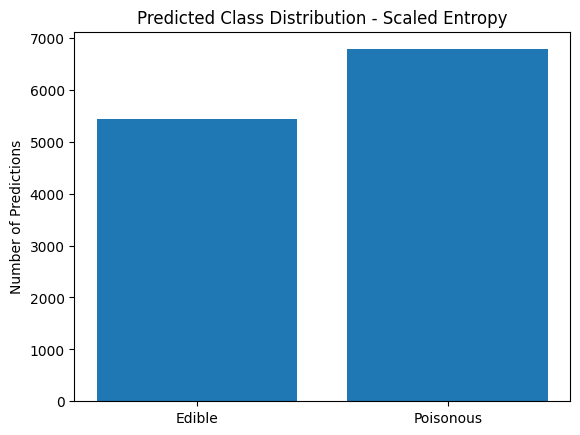

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_tree = DecisionTree(max_depth=7, min_samples_split=2, criterion='scaled_entropy')
best_tree.fit(X_train, y_train)

y_pred = best_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Scaled Entropy (Test Set)")
plt.show()

# Prediction distribution bar chart
unique, counts = np.unique(y_pred, return_counts=True)
plt.bar(["Edible", "Poisonous"], counts)
plt.title("Predicted Class Distribution - Scaled Entropy")
plt.ylabel("Number of Predictions")
plt.show()

## Random Forest
Implementing and evaluating a Random Forest classifier using:
- Bootstrapped datasets
- Random feature subsets (`sqrt` or `log2`)
- Voting from multiple decision trees

In [38]:
import random
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=5, min_samples_split=2,
                 criterion='gini', max_features='sqrt'):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.max_features = max_features  # can be 'sqrt', 'log2', or int
        self.trees = []
        self.feature_indices = []

    def _get_num_features(self, n_features):
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_features

    def fit(self, X, y):
        self.trees = []
        self.feature_indices = []
        n_samples, n_features = X.shape
        n_feats = self._get_num_features(n_features)

        for _ in range(self.n_trees):
            # Bootstrap sample
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            # Random feature subset
            feats = np.random.choice(n_features, n_feats, replace=False)
            self.feature_indices.append(feats)

            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                criterion=self.criterion)

            tree.fit(X_sample[:, feats], y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Each tree predicts using only its feature subset
        tree_preds = []
        for tree, feats in zip(self.trees, self.feature_indices):
            preds = tree.predict(X[:, feats])
            tree_preds.append(preds)

        # Transpose to get predictions per sample
        tree_preds = np.array(tree_preds).T
        final_preds = [Counter(row).most_common(1)[0][0] for row in tree_preds]
        return np.array(final_preds)

In [55]:
forest = RandomForest(n_trees=50, max_depth=7, min_samples_split=2,
                      criterion='scaled_entropy', max_features='sqrt')

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

test_error = np.mean(y_pred_forest != y_test)
test_accuracy = 1 - test_error

print(f"Random Forest Test Accuracy: {test_accuracy:.4f}")
print(f"Random Forest Test Error:    {test_error:.4f}")

Random Forest Test Accuracy: 0.8356
Random Forest Test Error:    0.1644


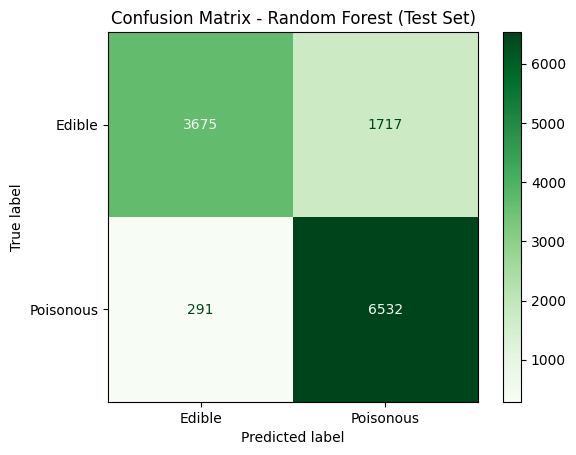

In [58]:
cm_rf = confusion_matrix(y_test, y_pred_forest)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Edible", "Poisonous"])
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.show()